In [21]:
# LDPC encode codeword generator
# HACK: does not work correctly

def poly(init):
    x = init
    iters = 0
    while(1):
        iters += 1
        yieldval = (x**8 + x**6 + x**4 + x**3 +x**2 + x +1) & 0xff
        yield yieldval
        x = yieldval
        if iters >= 10:
            return
        
for i in poly(6):
    print(i)

83
115
115
115
115
115
115
115
115
115


In [ ]:
def shift():
    iters = 0
    x = 0
    while(1):
        yield x
        x = 
    

In [22]:
mask = 0b1111_1111_0011_1001_1001_1110_0101_1010_0110_1000
mask

1096183339624

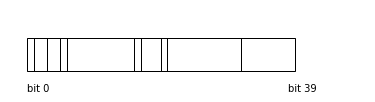

In [58]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
commonfill = None
widths = [1,2,2,1,10,1,3,1,11,8]
offset = 0
fields = []
for i in range(len(widths)):
    fields.append(
        patches.Rectangle(
            (offset, 1), widths[i], 5,
            fill=commonfill
        )
    )
    offset += widths[i]
for field in fields:
    ax.add_patch(field)

#for offset in range(sum(widths)):
#    ax.text(str(offset),-2,str(offset), rotation=90)
ax.text(0, -2, "bit 0")
ax.text(39, -2, "bit 39")

plt.axis('off')
plt.xlim(0,50)
plt.ylim(0,10)
fig.savefig('rect5.png', dpi=90, bbox_inches='tight')

plt.show()

In [109]:
8 + 16+16+16+8+8

72

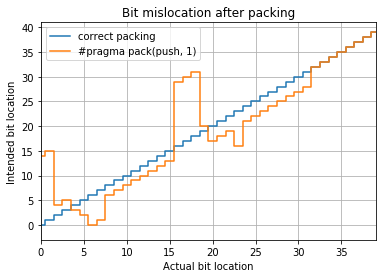

In [145]:
import numpy as np
pragma_packed_1 = [14] + [14, 15, 4,5,3,2,0,1,     6,7,8,9,10,11,12,13,      29,30,31,  20, 17,18,19  ,16,
 21,22,23,24,25,26,27,28,    32,33,34,35,36,37,38,39]

intended = [-1] +list(range(40))
plt.figure()
plt.grid()
plt.xlim(0,39)
plt.step(np.array(intended)+0.5, intended, label='correct packing')
plt.step(np.array(intended)+0.5, pragma_packed_1,label='#pragma pack(push, 1)')
plt.title('Bit mislocation after packing')
plt.xlabel('Actual bit location')
plt.ylabel('Intended bit location')
plt.legend()
plt.savefig('bit-mislocation.svg')
plt.savefig('../jarmokivekas.github.io/projects/c-struct-packing/mislocations.svg')
plt.show()

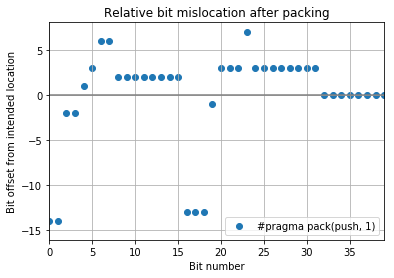

In [146]:
import numpy as np
pragma_packed_1 = [14] + [14, 15, 4,5,3,2,0,1,     6,7,8,9,10,11,12,13,      29,30,31,  20, 17,18,19  ,16,
 21,22,23,24,25,26,27,28,    32,33,34,35,36,37,38,39]

intended = [-1] +list(range(40))
pragma_packed_1 =  np.array(intended) -pragma_packed_1
plt.figure()
plt.grid()
plt.xlim(0,39)
#plt.step(np.array(intended)+0.5, intended, label='correct packing')
plt.axhline(0, color='gray')
plt.scatter(np.array(intended), pragma_packed_1,
         label='#pragma pack(push, 1)',
         
        )
plt.xlabel('Bit number')
plt.title('Relative bit mislocation after packing')
plt.ylabel('Bit offset from intended location')
plt.legend()
plt.savefig('bit-mislocation.svg')
plt.savefig('../jarmokivekas.github.io/projects/c-struct-packing/mislocations-relative.svg')
plt.show()